In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('credit_history.csv')

In [3]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 7 columns):
default      7727 non-null int64
amount       7727 non-null int64
grade        7727 non-null object
years        7448 non-null float64
ownership    7727 non-null object
income       7727 non-null float64
age          7727 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 362.3+ KB


In [5]:
df.fillna(4.0,inplace=True)

In [6]:
x=df.drop('default',axis=1)
y=df.default

In [7]:
x.shape

(7727, 6)

In [8]:
y.shape

(7727,)

In [9]:
x=pd.get_dummies(x)

In [10]:
x.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=10)

In [13]:
x_train.shape

(7707, 15)

In [14]:
y_train.shape

(7707,)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
clf=DecisionTreeClassifier(max_depth=5,random_state=10,criterion='entropy')

In [84]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [85]:
clf.score(x_test,y_test)

0.8

In [86]:
pred=clf.predict(x_test)

In [87]:
pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
roc_auc_score(y_test,pred)

0.7979797979797981

In [90]:
import pydotplus
import os
from IPython.display import Image  
#from six import StringIO  
from sklearn.tree import export_graphviz

In [91]:
os.environ["PATH"]+=os.pathsep+'c:/program files/Graphviz2.38/bin'

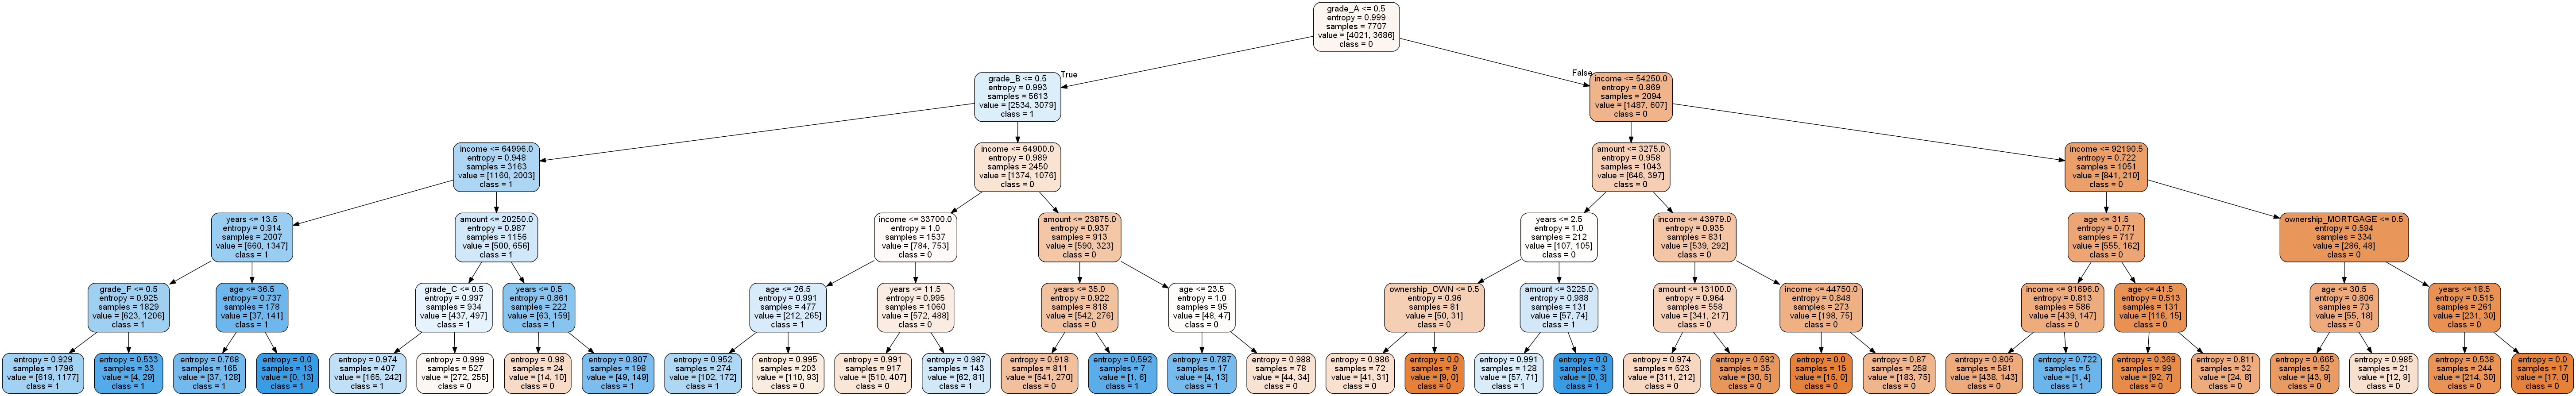

In [92]:
dot_data = export_graphviz(clf, out_file=None,feature_names=x.columns,class_names=['0','1'],filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [95]:
from sklearn.model_selection import GridSearchCV

In [98]:
param={'max_depth':[2,3,4,5]}
clf = GridSearchCV(clf,param , cv=5)

In [99]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=10,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [101]:
clf.best_score_

0.6311145711690671

In [102]:
clf.best_params_

{'max_depth': 2}